<a href="https://colab.research.google.com/github/ol8vil/thingsboard/blob/master/GAAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from sympy import *

init_printing(use_unicode=True)

In [ ]:
PR1 = 20*10**6 # reservoir pressure for 1st well
PR2 = 20*10**6 # reservoir pressure for 2nd well 
PRw1 = 18*10**6 # downhole pressure for 1st well 
PRw2 = 18*10**6 # downhole pressure for 2nd well
R1 = 300 # contour supplement radius for 1st well 
R2 = 300 # contour supplement radius for 2nd well 
Rw1 = 0.12 # 1st well’s radius 
Rw2 = 0.12 # 2nd well’s radius 
b1 = 140 # vertical distance from 1st well to origin of the coordinates in the intersection area 
b2 = 140 # vertical distance from 2nd well to origin of the coordinates in the intersection area 
h1 = 4 # thickness of the reservoir layer 
h2 = 4 # thickness of the reservoir layer 
k = 0.63*10**-2 # permeability coefficient 
μ = 1*10**-2
r1z1 = 57.4 # radius on edge of zone 1 for well 1 
r1z2 = 262 # radius on edge of zone 2 for well 1 
μz1 = 103.4*10**-4 # viscosity on the boarder of the 1st zone 
μz2 = 141*10**-4 # viscosity on the boarder of the 2nd zone 
μz3 = 206.9*10**-4 # viscosity on the boarder of the 3rd zone (contour supplement) 
P1z1 = PR1-((PR1-PRw1) * math.log(R1/r1z1))/math.log(R1/Rw1)# pressure on edge of zone 1 for well 1 
P1z2 = PR1-((PR1-PRw1) * math.log(R1/r1z2))/math.log(R1/Rw1)# pressure on edge of zone 2 for well 1 
P2z1 = P1z1 # pressure on edge of zone 1 for well 2 
P2z2 = P1z2 # pressure on edge of zone 2 for well 2 
r2z1 = R2 * (R2/Rw2)**(-(PR2-P2z1)/(PR2-PRw2)) # radius on edge of zone 1 for well 2 
r2z2 = R2 * (R2/Rw2)**(-(PR2-P2z2)/(PR2-PRw2)) # radius on edge of zone 2 for well 2 

In [ ]:
# Calculate the ratio of the pressure drop over the natural log of the contour
# supplement radius over wells radius for both wells
DP1 = (PR1 - PRw1) / log(R1 / Rw1)
DP2 = (PR2 - PRw2) / log(R2 / Rw2)

In [ ]:
# define radius for any given point in the intersection area for the 1st and 
# 2nd well
x, y = symbols('x y')
r1 = sqrt(x**2 + (y+b1)**2)
r2 = sqrt(x**2 + (y-b2)**2)

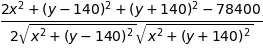

In [ ]:
# define Cos[θ] as a function of the angle between the two pressure vectors
w = (r1**2 +r2**2 - (b1+b2)**2) / (2*r1*r2)
w

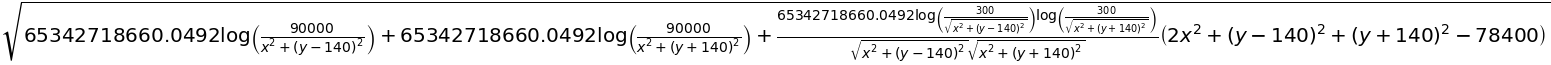

In [ ]:
#define the Net pressure function for both pressure vectors
P = sqrt(DP1**2 * log((R1/r1)**2)+DP2**2*log((R2/r2)**2)+2*DP1*DP2*log(R2/r2)*log(R1/r1)*w)
P

In [ ]:
xintersection = (math.sqrt(-(b1+b2)**4+2*R1**2*(b1+b2)**2+2*R2**2*(b1+b2)**2-(R1-R2)**2))/(2*sqrt(b1**2+2*b1*b2+b2**2))
yintersection = (-b1**2+b2**2+R1**2-R2**2)/(2*(b1+b2))
print(xintersection)
print(yintersection)

265.329983228432
0.0


In [ ]:
yP0 = solve(DP1*log(R1/r1.subs(x, 0))-DP2*log(R2/r2.subs(x, 0)),y) # -4.89639*10**-15
yP0